In [2]:
import pandas as pd
import numpy as np

## Read and preprocess Data from Schellebelle station in Belgium

### Read raw data 

In [3]:
Schellebelle_pH=pd.read_csv('Schellebelle SF Zeeschelde_pH.csv',delimiter=';',header=7)# water PH

Schellebelle_Watertemperature=pd.read_csv('Schellebelle SF Zeeschelde_Watertemperature.csv',delimiter=';',header=7)# Water Temperature

Schellebelle_Turbidity=pd.read_csv('Schellebelle SF Zeeschelde_Turbidity.csv',delimiter=';',header=7) #Water Turbidity

Schellebelle_Dissolved_Oxygen=pd.read_csv('Schellebelle SF Zeeschelde_Dissolved Oxygen.csv',delimiter=';',header=7)#Water's Disolved Oxygen

Schellebelle_Conductivity=pd.read_csv('Schellebelle SF Zeeschelde_Conductivity.csv',delimiter=';',header=7)#Water conductivity

Schellebelle_Salinity=pd.read_csv('Schellebelle SF Zeeschelde_Salinity.csv',delimiter=';',header=7)#Water Salinity

Schellebelle_Chlorofyl=pd.read_csv('Schellebelle SF Zeeschelde_Chlorofyl.csv',delimiter=';',header=7)#Water Chlorofyl


### Preprocess data 

In [4]:
Schellebelle_pH=Schellebelle_pH.rename(columns={'Value':'PH','#Timestamp':'Date1'})
Schellebelle_pH=Schellebelle_pH.drop(columns={'Quality Code','Absolute Value','AV Quality Code'})

Schellebelle_Watertemperature=Schellebelle_Watertemperature.rename(columns={'Value':'Watertemperature','#Timestamp':'Date2'})
Schellebelle_Watertemperature=Schellebelle_Watertemperature.drop(columns={'Quality Code','Absolute Value','AV Quality Code'})

Schellebelle_Turbidity=Schellebelle_Turbidity.rename(columns={'Value':'Turbidity','#Timestamp':'Date3'})
Schellebelle_Turbidity=Schellebelle_Turbidity.drop(columns={'Quality Code','Absolute Value','AV Quality Code'})

Schellebelle_Dissolved_Oxygen=Schellebelle_Dissolved_Oxygen.rename(columns={'Value':'Dissolved Oxygen','#Timestamp':'Date4'})
Schellebelle_Dissolved_Oxygen=Schellebelle_Dissolved_Oxygen.drop(columns={'Quality Code','Absolute Value','AV Quality Code'})

Schellebelle_Conductivity=Schellebelle_Conductivity.rename(columns={'Value':'Conductivity','#Timestamp':'Date5'})
Schellebelle_Conductivity=Schellebelle_Conductivity.drop(columns={'Quality Code','Absolute Value','AV Quality Code'})

Schellebelle_Salinity=Schellebelle_Salinity.rename(columns={'Value':'Salinity','#Timestamp':'Date6'})
Schellebelle_Salinity=Schellebelle_Salinity.drop(columns={'Quality Code','Absolute Value','AV Quality Code'})

Schellebelle_Chlorofyl=Schellebelle_Chlorofyl.rename(columns={'Value':'Chlorofyl','#Timestamp':'Date7'})
Schellebelle_Chlorofyl=Schellebelle_Chlorofyl.drop(columns={'Quality Code','Absolute Value','AV Quality Code'})

In [5]:
Schellebelle_pH=Schellebelle_pH.apply(lambda x: x.str.replace(',','.'))# replace ',' with '.' in order to make calculations
Schellebelle_Watertemperature=Schellebelle_Watertemperature.apply(lambda x: x.str.replace(',','.'))
Schellebelle_Dissolved_Oxygen=Schellebelle_Dissolved_Oxygen.apply(lambda x: x.str.replace(',','.'))
Schellebelle_Salinity=Schellebelle_Salinity.apply(lambda x: x.str.replace(',','.'))
Schellebelle_Chlorofyl=Schellebelle_Chlorofyl.apply(lambda x: x.str.replace(',','.'))


Schellebelle_pH['PH']=Schellebelle_pH['PH'].astype(float).round(3)
Schellebelle_Watertemperature['Watertemperature']=Schellebelle_Watertemperature['Watertemperature'].astype(float).round(3)
Schellebelle_Dissolved_Oxygen['Dissolved Oxygen']=Schellebelle_Dissolved_Oxygen['Dissolved Oxygen'].astype(float).round(3)
Schellebelle_Salinity['Salinity']=Schellebelle_Salinity['Salinity'].astype(float).round(3)
Schellebelle_Chlorofyl['Chlorofyl']=Schellebelle_Chlorofyl['Chlorofyl'].astype(float).round(3)


In [6]:
Schellebelle_pH['Date1']=Schellebelle_pH['Date1'].str[:10]
Schellebelle_pH['Date1']=pd.to_datetime(Schellebelle_pH['Date1'])
Schellebelle_pH = Schellebelle_pH.set_index('Date1')
ph=Schellebelle_pH.reset_index().groupby(pd.Grouper(key='Date1', freq='D'))['PH'].mean()#find the mean of multiple loggs per day
ph=ph.reset_index()
ph=ph.rename(columns={'PH':'Mean PH'})

Schellebelle_Watertemperature['Date2']=Schellebelle_Watertemperature['Date2'].str[:10]
Schellebelle_Watertemperature['Date2']=pd.to_datetime(Schellebelle_Watertemperature['Date2'])
Schellebelle_Watertemperature = Schellebelle_Watertemperature.set_index('Date2')
wt=Schellebelle_Watertemperature.reset_index().groupby(pd.Grouper(key='Date2', freq='D'))['Watertemperature'].mean()
wt=wt.reset_index()
wt=wt.rename(columns={'Watertemperature':'Mean Watertemperature'})

Schellebelle_Turbidity['Date3']=Schellebelle_Turbidity['Date3'].str[:10]
Schellebelle_Turbidity['Date3']=pd.to_datetime(Schellebelle_Turbidity['Date3'])
Schellebelle_Turbidity = Schellebelle_Turbidity.set_index('Date3')
tur=Schellebelle_Turbidity.reset_index().groupby(pd.Grouper(key='Date3', freq='D'))['Turbidity'].mean()
tur=tur.reset_index()
tur=tur.rename(columns={'Turbidity':'Mean Turbidity'})

Schellebelle_Dissolved_Oxygen['Date4']=Schellebelle_Dissolved_Oxygen['Date4'].str[:10]
Schellebelle_Dissolved_Oxygen['Date4']=pd.to_datetime(Schellebelle_Dissolved_Oxygen['Date4'])
Schellebelle_Dissolved_Oxygen = Schellebelle_Dissolved_Oxygen.set_index('Date4')
do=Schellebelle_Dissolved_Oxygen.reset_index().groupby(pd.Grouper(key='Date4', freq='D'))['Dissolved Oxygen'].mean()
do=do.reset_index()
do=do.rename(columns={'Dissolved Oxygen':'Mean Dissolved Oxygen'})

Schellebelle_Conductivity['Date5']=Schellebelle_Conductivity['Date5'].str[:10]
Schellebelle_Conductivity['Date5']=pd.to_datetime(Schellebelle_Conductivity['Date5'])
Schellebelle_Conductivity = Schellebelle_Conductivity.set_index('Date5')
con=Schellebelle_Conductivity.reset_index().groupby(pd.Grouper(key='Date5', freq='D'))['Conductivity'].mean()
con=con.reset_index()
con=con.rename(columns={'Conductivity':'Mean Conductivity'})

Schellebelle_Salinity['Date6']=Schellebelle_Salinity['Date6'].str[:10]
Schellebelle_Salinity['Date6']=pd.to_datetime(Schellebelle_Salinity['Date6'])
Schellebelle_Salinity = Schellebelle_Salinity.set_index('Date6')
sal=Schellebelle_Salinity.reset_index().groupby(pd.Grouper(key='Date6', freq='D'))['Salinity'].mean()
sal=sal.reset_index()
sal=sal.rename(columns={'Salinity':'Mean Salinity'})

Schellebelle_Chlorofyl['Date7']=Schellebelle_Chlorofyl['Date7'].str[:10]
Schellebelle_Chlorofyl['Date7']=pd.to_datetime(Schellebelle_Chlorofyl['Date7'])
Schellebelle_Chlorofyl = Schellebelle_Chlorofyl.set_index('Date7')
chlor=Schellebelle_Chlorofyl.reset_index().groupby(pd.Grouper(key='Date7', freq='D'))['Chlorofyl'].mean()
chlor=chlor.reset_index()
chlor=chlor.rename(columns={'Chlorofyl':'Mean Chlorofyl'})

### Merged seperate features into one using the  Date as the Key 

In [7]:
m1=pd.merge(wt,ph,left_on='Date2',right_on='Date1',how='left')
m2=pd.merge(tur,do,left_on='Date3',right_on='Date4',how='left')
m3=pd.merge(con,sal,left_on='Date5',right_on='Date6',how='left')
temp1=pd.merge(m1,m2,left_on='Date1',right_on='Date3',how='left')
temp2=pd.merge(temp1,m3,left_on='Date1',right_on='Date5',how='left')
final_df=pd.merge(temp2,chlor,left_on='Date1',right_on='Date7',how='left')


In [8]:
final_df=final_df.drop(columns={'Date2','Date3','Date4','Date5','Date6','Date7'})
final_df=final_df.rename(columns={'Date1':'Date'})
final_df=final_df.iloc[:, [1,2,0,3,4,5,6,7]]
final_df=final_df.bfill()

In [9]:
final_df

,Date,Mean PH,Mean Watertemperature,Mean Turbidity,Mean Dissolved Oxygen,Mean Conductivity,Mean Salinity,Mean Chlorofyl
0,2021-04-02,7.586000,9.778000,14.391892,9.264706,677.460000,0.473533,6.628758
1,2021-04-03,7.586000,9.778000,14.391892,9.264706,677.460000,0.473533,6.628758
2,2021-04-04,7.586000,9.778000,14.391892,9.264706,677.460000,0.473533,6.628758
3,2021-04-05,7.586000,9.778000,14.391892,9.264706,677.460000,0.473533,6.628758
4,2021-04-06,7.586000,9.778000,14.391892,9.264706,677.460000,0.473533,6.628758
...,...,...,...,...,...,...,...,...
362,2022-03-30,7.852431,12.210069,25.045139,9.350347,754.850694,0.496944,10.620833
363,2022-03-31,7.898611,11.976736,22.815972,9.450347,751.381944,0.497882,10.678819
364,2022-04-01,7.900694,11.142708,19.038194,9.630556,729.250000,0.492986,9.947222
365,2022-04-02,7.923264,10.216319,19.121528,9.921181,727.534722,0.503681,9.950347


## Import Weather Data using meteostat  API

In [70]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Stations, Daily

In [11]:
start = datetime(2021, 4, 3) #declare the first day from the requested period of time
end = datetime(2022, 4, 3) #declarde the last day from the requested period of time

In [12]:
stations = Stations() #declare station
stations = stations.nearby(51.0115409, 3.917)#longtitude and latitude of Schellebelle
station = stations.fetch(1)

# We are able to fetch the data from Melle's Weather Station, which is the closest to Schellebelle

In [13]:
station

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
06434,Melle / Kalverhaag,BE,VLG,06434,<NA>,50.9833,3.8167,13.0,Europe/Brussels,2009-10-26,2022-03-28,2009-11-20,2022-03-28,2015-01-01,2020-01-01,7689.537393


In [14]:
weather_data = Daily(station, start, end)
weather_data = weather_data.fetch()

## Preprocess 

In [15]:
weather_data=weather_data.rename(columns={'time':'Date','tavg':'Average Temperature','tmin':'Min Temperature','tmax':'Max Temperature','prcp':
                                        
                                        'PRCP',"wdir":'Wind Direction','wspd':'Wind Speed','pres':'Pressure'})

In [16]:
weather_data=weather_data.reset_index()
weather_data=weather_data.drop(columns={'snow','wpgt','tsun'})
weather_data=weather_data.rename(columns={'time':'Date'})

## The actial anual data, matching our dates from the water features dataframe

In [71]:
weather_data

,Date,Average Temperature,Min Temperature,Max Temperature,PRCP,Wind Direction,Wind Speed,Pressure
0,2021-04-03,7.1,4.7,10.1,0.0,14.0,17.3,1029.1
1,2021-04-04,6.1,4.3,8.7,0.0,344.0,8.0,1026.0
2,2021-04-05,4.4,2.2,7.4,0.9,297.0,20.4,1015.3
3,2021-04-06,1.9,0.3,5.5,5.2,309.0,17.4,1017.4
4,2021-04-07,2.8,-0.1,5.8,1.0,288.0,17.0,1021.0
...,...,...,...,...,...,...,...,...
360,2022-03-30,8.7,5.4,11.6,1.0,46.0,11.6,1004.8
361,2022-03-31,5.0,2.1,8.3,3.2,0.0,16.7,1001.5
362,2022-04-01,2.3,0.4,4.6,5.5,23.0,25.2,1008.3
363,2022-04-02,3.0,-0.5,7.3,0.0,19.0,17.3,1018.8


In [10]:
#weather_data=pd.read_excel('Weather_data_from_Melle_Station.xlsx', header=0)  

## Merging Water Features Dataframe with Weather Dataframe  based on the same date

In [74]:
df=pd.merge(weather_data,final_df,left_on=['Date'],right_on=['Date'],how='left')

In [75]:
df.head()

,Date,Average Temperature,Min Temperature,Max Temperature,PRCP,Wind Direction,Wind Speed,Pressure,Mean PH,Mean Watertemperature,Mean Turbidity,Mean Dissolved Oxygen,Mean Conductivity,Mean Salinity,Mean Chlorofyl
0,2021-04-03,7.1,4.7,10.1,0.0,14.0,17.3,1029.1,7.586000,9.778000,14.391892,9.264706,677.460000,0.473533,6.628758
1,2021-04-04,6.1,4.3,8.7,0.0,344.0,8.0,1026.0,7.586000,9.778000,14.391892,9.264706,677.460000,0.473533,6.628758
2,2021-04-05,4.4,2.2,7.4,0.9,297.0,20.4,1015.3,7.586000,9.778000,14.391892,9.264706,677.460000,0.473533,6.628758
3,2021-04-06,1.9,0.3,5.5,5.2,309.0,17.4,1017.4,7.586000,9.778000,14.391892,9.264706,677.460000,0.473533,6.628758
4,2021-04-07,2.8,-0.1,5.8,1.0,288.0,17.0,1021.0,7.570139,9.214583,15.697917,9.526389,653.989583,0.464062,6.435069


## Basic Statistical info for the final dataframe 

In [20]:
df.describe()

,Average Temperature,Min Temperature,Max Temperature,PRCP,Wind Direction,Wind Speed,Pressure,Mean PH,Mean Watertemperature,Mean Turbidity,Mean Dissolved Oxygen,Mean Conductivity,Mean Salinity,Mean Chlorofyl
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,10.980274,7.114521,14.846301,2.113973,194.219178,12.227397,1018.181918,7.769300,13.515578,43.942922,8.298855,668.376577,0.424316,16.969299
std,5.514491,5.498764,6.201096,3.496151,100.290354,5.359091,9.659409,0.349317,5.530816,24.354400,3.041690,120.755388,0.051831,17.624630
min,-1.800000,-5.100000,1.800000,0.000000,0.000000,3.700000,989.300000,5.682986,5.218750,14.391892,0.000000,381.715278,0.293333,3.419792
25%,6.600000,2.500000,10.000000,0.000000,105.000000,8.300000,1011.800000,7.681944,9.407639,27.690972,6.934375,582.527778,0.387882,5.621528
50%,10.300000,6.900000,14.500000,0.400000,223.000000,11.100000,1018.800000,7.773958,12.292361,36.822917,8.782292,681.239583,0.420590,8.951736
75%,16.400000,12.100000,20.200000,2.700000,266.000000,15.400000,1024.700000,7.900000,19.627431,51.951389,10.022222,743.083333,0.468542,23.833681
max,23.900000,20.700000,28.900000,31.400000,358.000000,33.600000,1041.900000,8.629514,24.728819,214.187500,16.809722,901.343750,0.527153,98.162500


## Including the Variance per feature 

In [21]:
df.var()

Average Temperature         30.409610
Min Temperature             30.236409
Max Temperature             38.453592
PRCP                        12.223073
Wind Direction           10058.155126
Wind Speed                  28.719852
Pressure                    93.304178
Mean PH                      0.122022
Mean Watertemperature       30.589922
Mean Turbidity             593.136783
Mean Dissolved Oxygen        9.251880
Mean Conductivity        14581.863655
Mean Salinity                0.002686
Mean Chlorofyl             310.627574
dtype: float64

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# USING PEARSON'S CORRELATION

### A correlation coefficient of 1 means that for every positive increase in one variable, there is a positive increase of a fixed proportion in the other. For example, shoe sizes go up in (almost) perfect correlation with foot length.
### A correlation coefficient of -1 means that for every positive increase in one variable, there is a negative decrease of a fixed proportion in the other. For example, the amount of gas in a tank decreases in (almost) perfect correlation with speed.
### Zero means that for every increase, there isn’t a positive or negative increase. The two just aren’t related. 

# 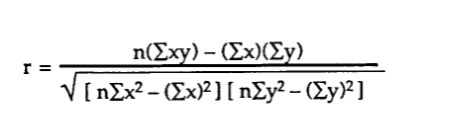

## Display Using a Heatmap 

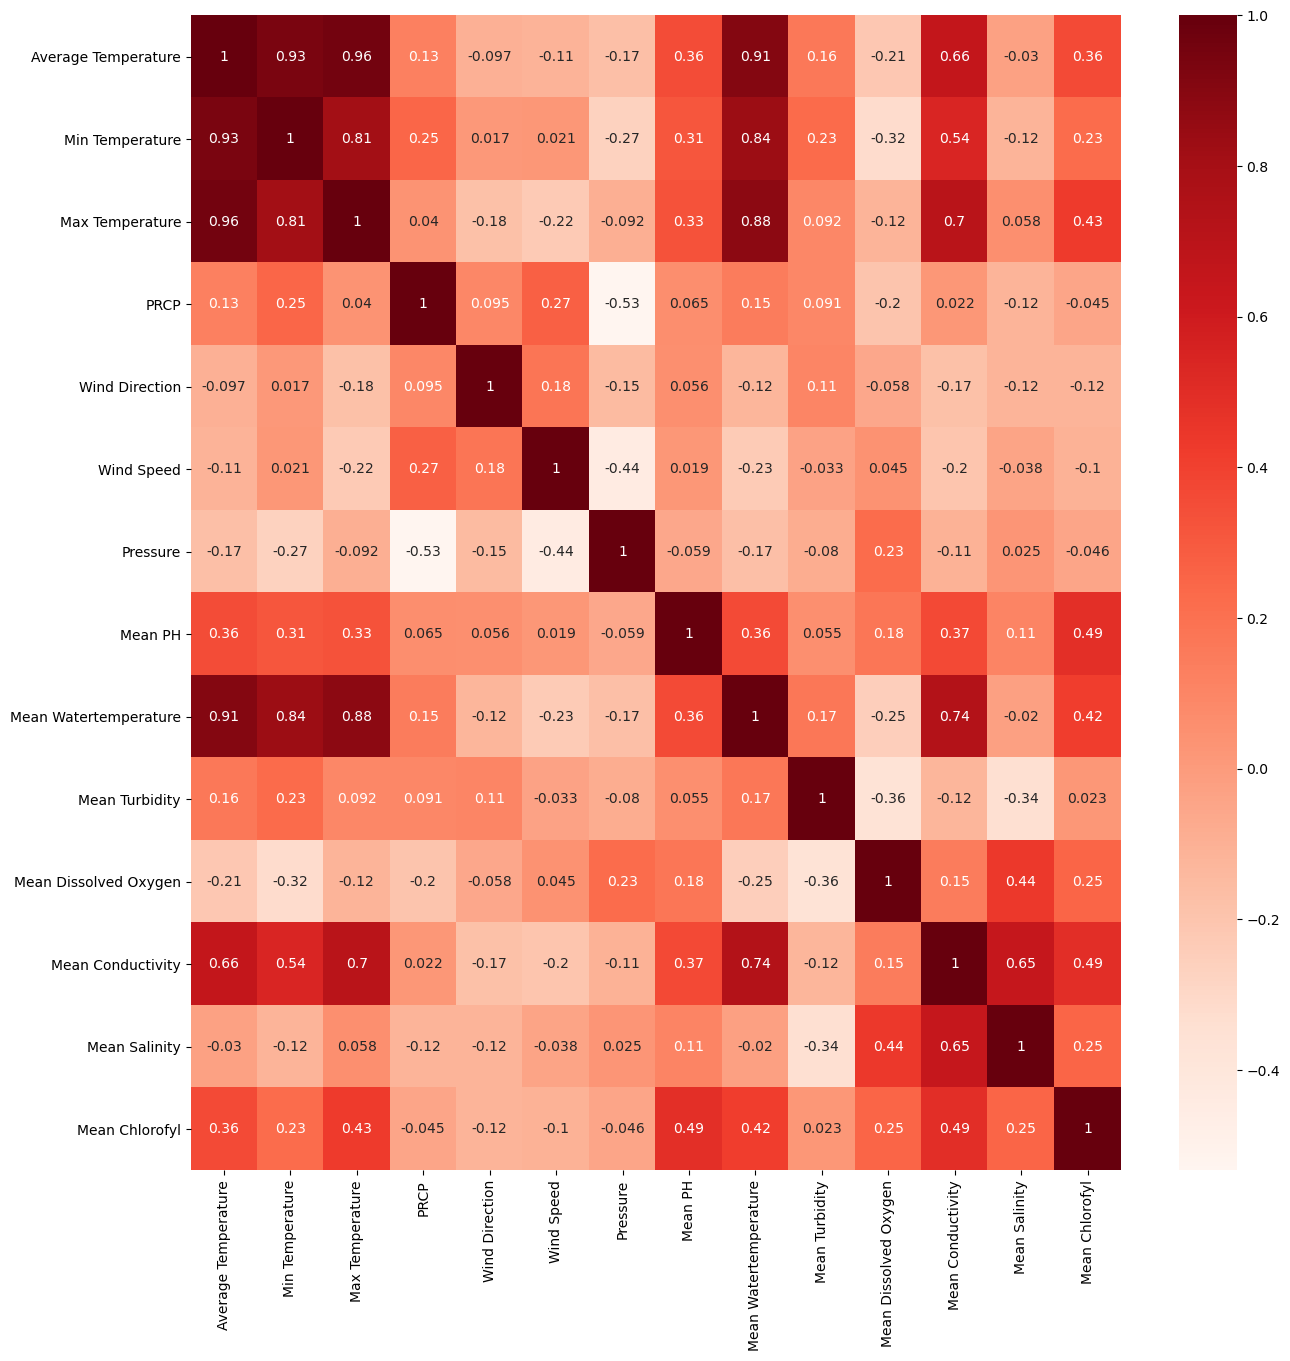

In [23]:

plt.figure(figsize=(15,15))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
#plt.savefig("pearson_corr.png")
plt.show()

## Isolate Conductivity for better View 

In [24]:
only_conductivity=corr.iloc[[11]]
only_conductivity=only_conductivity.T
only_conductivity=only_conductivity.rename(columns={'Mean Conductivity':'Pearson Correlation with Mean Conductivity'})
only_conductivity=only_conductivity.sort_values(by='Pearson Correlation with Mean Conductivity',ascending=False)
only_conductivity=only_conductivity.drop('Mean Conductivity')

### The correlations between Conductivity and the rest of the features in descending order. 

In [25]:
only_conductivity

,Pearson Correlation with Mean Conductivity
Mean Watertemperature,0.735052
Max Temperature,0.701661
Average Temperature,0.655939
Mean Salinity,0.645124
Min Temperature,0.544164
Mean Chlorofyl,0.494334
Mean PH,0.369061
Mean Dissolved Oxygen,0.148898
PRCP,0.022293
Pressure,-0.106951


### Display with a Bar plot 

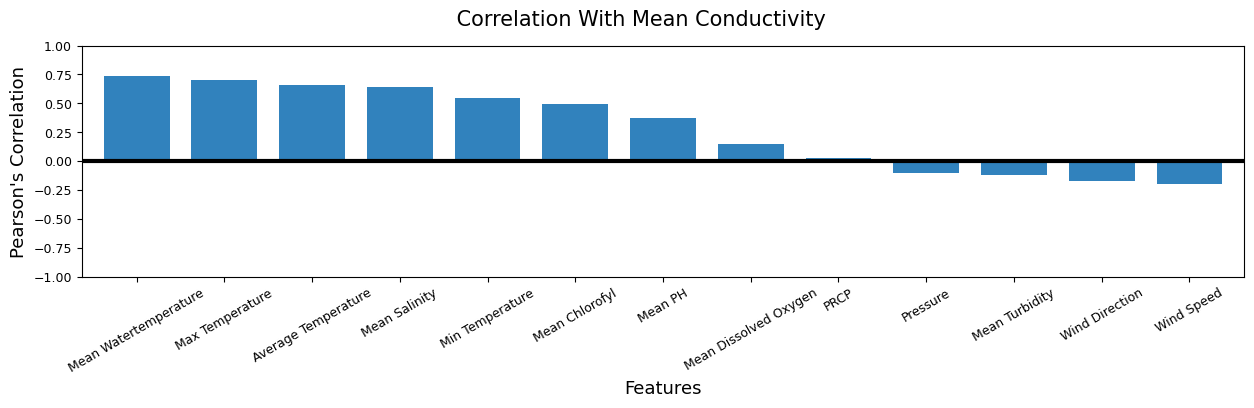

In [26]:
only_conductivity.plot.bar(colormap='tab20c', figsize=(15,3), fontsize=9, width=0.75, legend=False, rot=30,)

#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.suptitle(r' Correlation With Mean Conductivity  ', fontsize=15, y=1)
plt.xlabel(r'Features', fontsize=13)
plt.ylabel(r"Pearson's Correlation", fontsize=13)
plt.axhline(y=0.0, color='black', linestyle='-', linewidth=3)
plt.ylim([-1, 1])
plt.show()

In [27]:
df=df.set_index('Date')

In [28]:
conductivity_with_temp_and_sal_chlor=df[['Average Temperature','Mean Watertemperature','Mean Salinity','Mean Conductivity','Mean Chlorofyl']]

### Display top four positive correlated features with Mean Condicity 

### When it comes to the weather's Temperatures (Average ,Min,Max), since theay highly correlated with each other it is safe to keep on of them ,aiming for feature redution. I chose Average Temperature. 

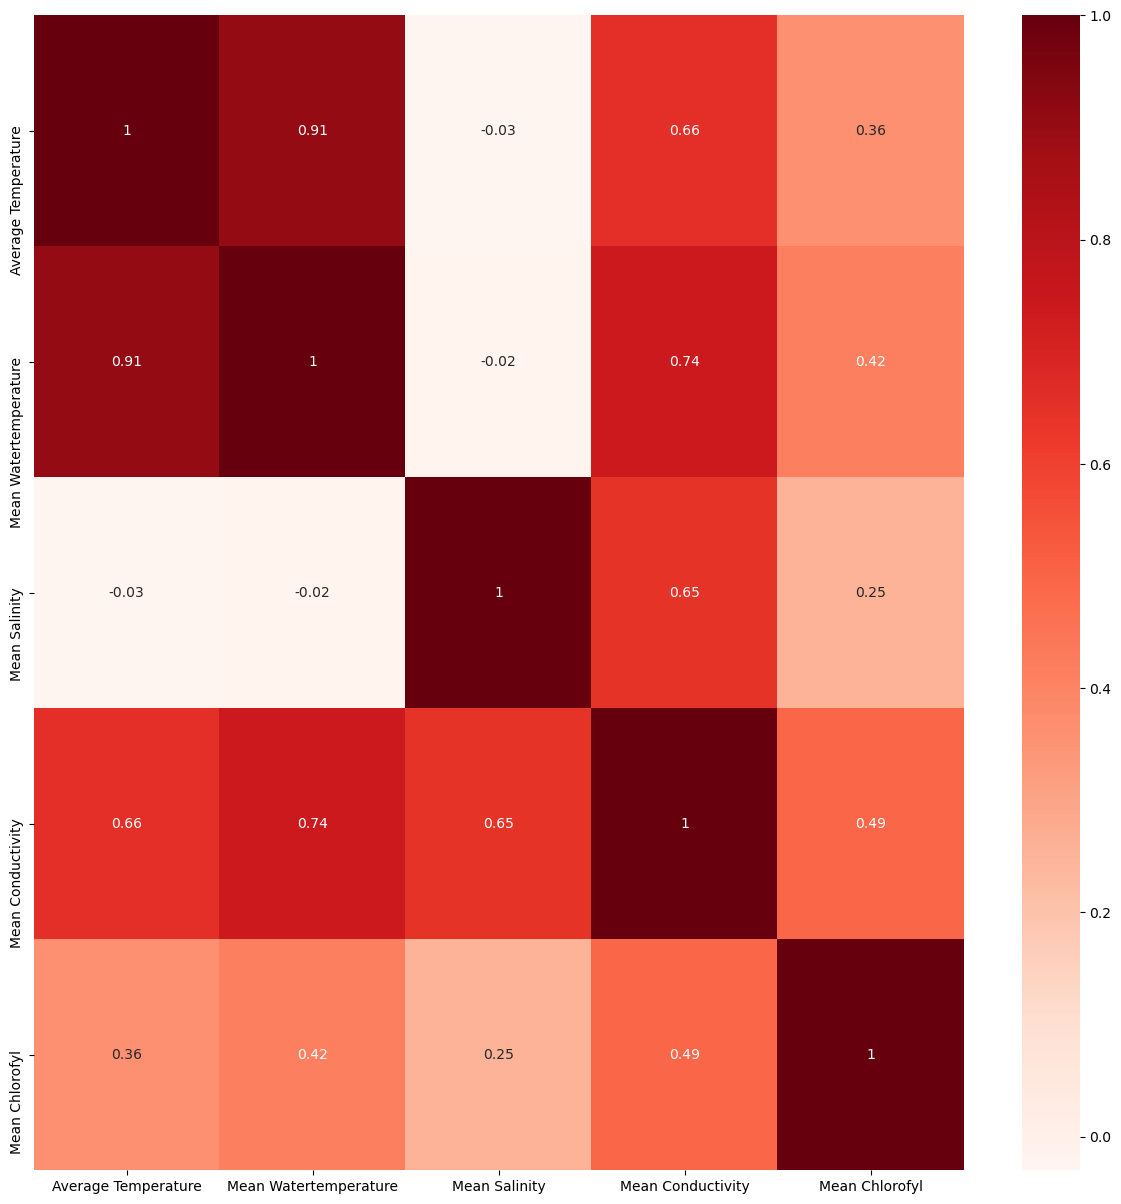

In [29]:
plt.figure(figsize=(15,15))
conductivity_with_temp_and_sal_chlor_corr = conductivity_with_temp_and_sal_chlor.corr()
sns.heatmap(conductivity_with_temp_and_sal_chlor_corr, annot=True, cmap=plt.cm.Reds)
#plt.savefig("pearson_corr.png")
plt.show()

### Display with a line plot to notice  if they have tha same trend or seasonality 

### It is clear that the Average Temperature, the Mean Water Temperature and the Mean Conductivity have similar plots proving their high correlation

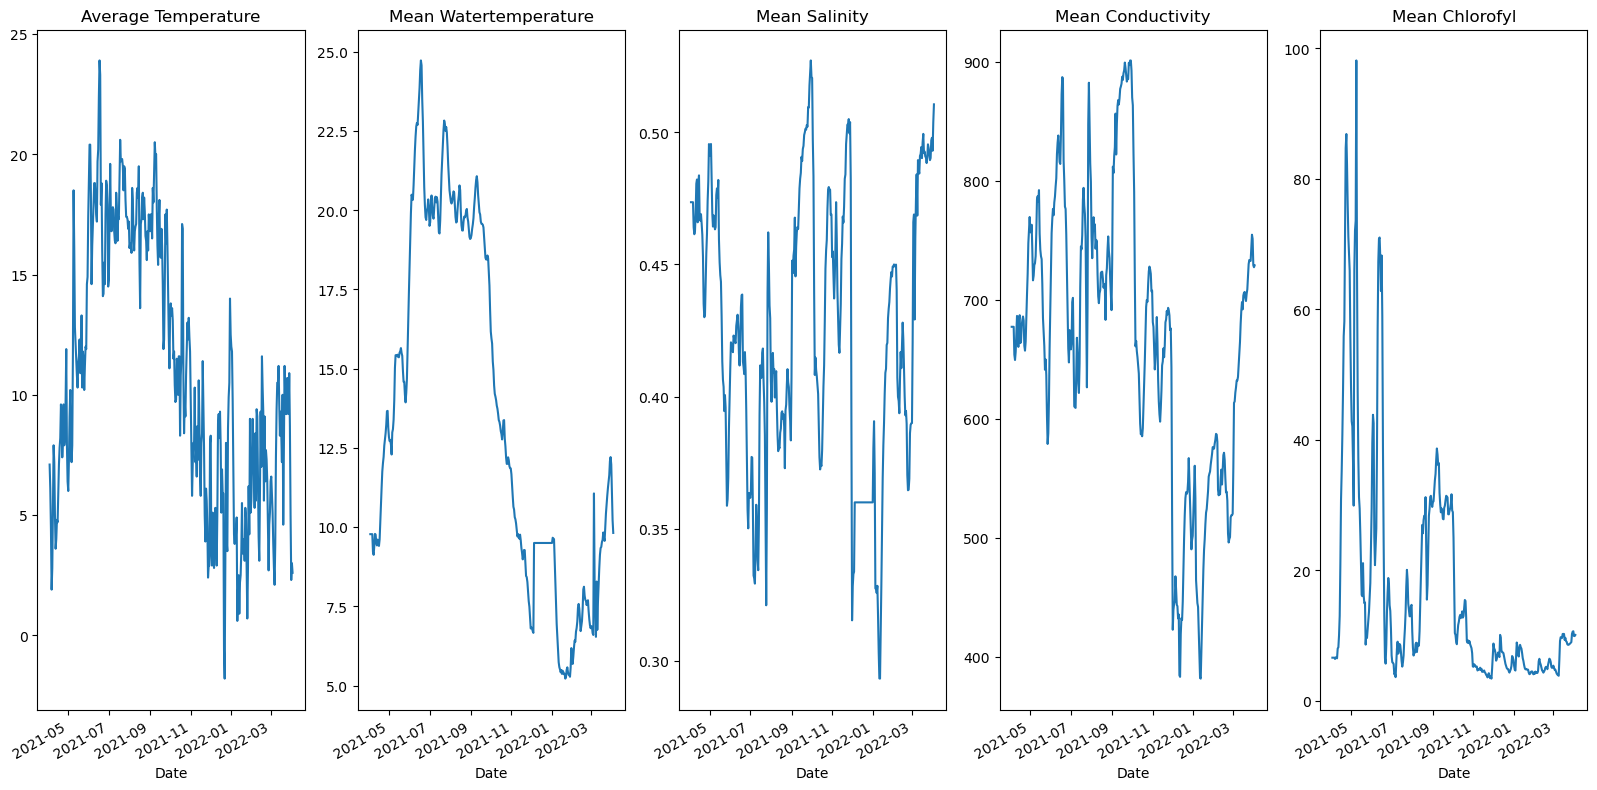

In [30]:
fig, axes = plt.subplots(1, 5,figsize=(20,10))
conductivity_with_temp_and_sal_chlor['Average Temperature'].plot(ax=axes[0],title='Average Temperature')
conductivity_with_temp_and_sal_chlor['Mean Watertemperature'].plot(ax=axes[1],title='Mean Watertemperature')
conductivity_with_temp_and_sal_chlor['Mean Salinity'].plot(ax=axes[2],title='Mean Salinity')
conductivity_with_temp_and_sal_chlor['Mean Conductivity'].plot(ax=axes[3],title='Mean Conductivity')
conductivity_with_temp_and_sal_chlor['Mean Chlorofyl'].plot(ax=axes[4],title='Mean Chlorofyl')

plt.show()

# Calculating the p-value in order to reject the null hypothesis

### When you perform a statistical test a p-value helps you determine the significance of your results in relation to the null hypothesis. Or in our case that the correlation of the features, calculated by the Pearsons correlation formula are not due to random causes meaning that there is no relationship between two measured phenomena. The smaller the p-value the stronger the evidence against the null hypothesis 

## Null hypothesis rejected and we are good to continue

In [31]:
from scipy import stats
corr_pval=pd.DataFrame(columns=['corr','p'])# r is pearson's correlation 
df2=conductivity_with_temp_and_sal_chlor
for col in df2:
    
    corr, p=stats.pearsonr(df2['Mean Conductivity'],df2[col])
    corr_pval.loc[col]=[round(corr,3),round(p,3)]
corr_pval

,corr,p
Average Temperature,0.656,0.0
Mean Watertemperature,0.735,0.0
Mean Salinity,0.645,0.0
Mean Conductivity,1.000,0.0
Mean Chlorofyl,0.494,0.0


## Using Mutual Information to help us select the best features for predicting Mean Conductivity 

## In probability theory and information theory, the mutual information (MI) of two random variables is a measure of the mutual dependence between the two variables. More specifically, it quantifies the "amount of information" (Entropy) obtained about one random variable by observing the other random variable. The concept of mutual information is intimately linked to that of entropy of a random variable, a fundamental notion in information theory that quantifies the expected "amount of information" held in a random variable. 

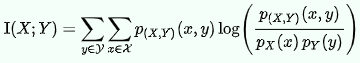

In [32]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [33]:
df=df.reset_index(drop=False)

In [34]:
df

,Date,Average Temperature,Min Temperature,Max Temperature,PRCP,Wind Direction,Wind Speed,Pressure,Mean PH,Mean Watertemperature,Mean Turbidity,Mean Dissolved Oxygen,Mean Conductivity,Mean Salinity,Mean Chlorofyl
0,2021-04-03,7.1,4.7,10.1,0.0,14.0,17.3,1029.1,7.586000,9.778000,14.391892,9.264706,677.460000,0.473533,6.628758
1,2021-04-04,6.1,4.3,8.7,0.0,344.0,8.0,1026.0,7.586000,9.778000,14.391892,9.264706,677.460000,0.473533,6.628758
2,2021-04-05,4.4,2.2,7.4,0.9,297.0,20.4,1015.3,7.586000,9.778000,14.391892,9.264706,677.460000,0.473533,6.628758
3,2021-04-06,1.9,0.3,5.5,5.2,309.0,17.4,1017.4,7.586000,9.778000,14.391892,9.264706,677.460000,0.473533,6.628758
4,2021-04-07,2.8,-0.1,5.8,1.0,288.0,17.0,1021.0,7.570139,9.214583,15.697917,9.526389,653.989583,0.464062,6.435069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2022-03-30,8.7,5.4,11.6,1.0,46.0,11.6,1004.8,7.852431,12.210069,25.045139,9.350347,754.850694,0.496944,10.620833
361,2022-03-31,5.0,2.1,8.3,3.2,0.0,16.7,1001.5,7.898611,11.976736,22.815972,9.450347,751.381944,0.497882,10.678819
362,2022-04-01,2.3,0.4,4.6,5.5,23.0,25.2,1008.3,7.900694,11.142708,19.038194,9.630556,729.250000,0.492986,9.947222
363,2022-04-02,3.0,-0.5,7.3,0.0,19.0,17.3,1018.8,7.923264,10.216319,19.121528,9.921181,727.534722,0.503681,9.950347


In [35]:
X=df.drop(columns={'Mean Conductivity','Date'})
y=df['Mean Conductivity']

In [36]:
xtr,xtest,ytr,ytest=train_test_split(X,y,test_size=0.3,random_state=0)

In [37]:
mi=mutual_info_regression(xtr,ytr)
mi=pd.Series(mi)
mi.index=xtr.columns
mi.sort_values(ascending=False,inplace=True)

## Display MI Score per feature using a bar plot 

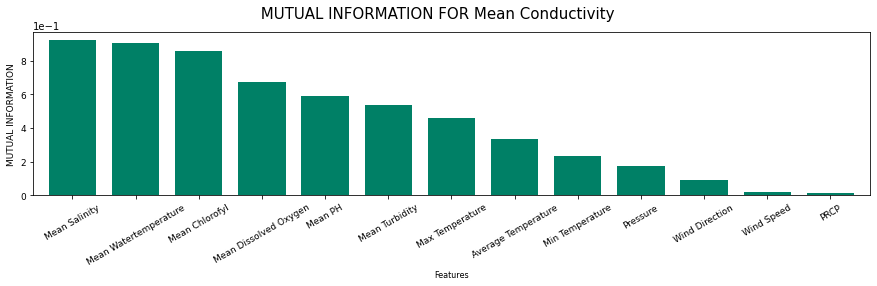

In [38]:
mi.plot.bar(colormap='summer', figsize=(15,3), fontsize=9, width=0.75, legend=False, rot=30,)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.suptitle(r' MUTUAL INFORMATION FOR Mean Conductivity ', fontsize=15, y=1)
plt.xlabel(r'Features', fontsize=8)
plt.ylabel(r'MUTUAL INFORMATION', fontsize=9)
plt.show()

In [39]:
from sklearn.feature_selection import SelectKBest

# Using K-Best to select us the top 5 features bases on the Mutual Information with Mean Conductivity

### As we can see, the results of top 5 best features are somewhere different from the Perason's Correlations.
### But this is Ok. This Mutual Information shows us the mutual information (entropy) that the features have with mean conductivity, not indicating if its positive or negative. 
### For example mean Chlorofyl  have a large MI Score, but when we view the correlation we see that firstly it is positive but the correlation is not super high.

### We should take both measurements in consideration in order to choose the final features for our dataframe. 

In [40]:
kbest=SelectKBest(mutual_info_regression,k=5).fit(xtr,ytr)
dfscores = pd.DataFrame(kbest.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','MI Score']
featureScores=featureScores.sort_values(by=['MI Score'],ascending=False)
featureScores

,Features,MI Score
11,Mean Salinity,0.924761
8,Mean Watertemperature,0.907169
12,Mean Chlorofyl,0.855210
10,Mean Dissolved Oxygen,0.671637
7,Mean PH,0.597330
9,Mean Turbidity,0.537403
2,Max Temperature,0.459739
0,Average Temperature,0.337371
1,Min Temperature,0.223207
6,Pressure,0.175716


# Using Both Measurements, the final dataframe that will be used in the NN in order to make predictions for Mean Conductivity is... 

In [77]:
conductivity_with_temp_and_sal_chlor.head()

,Average Temperature,Mean Watertemperature,Mean Salinity,Mean Conductivity,Mean Chlorofyl
Date,,,,,
2021-04-03,7.1,9.778000,0.473533,677.460000,6.628758
2021-04-04,6.1,9.778000,0.473533,677.460000,6.628758
2021-04-05,4.4,9.778000,0.473533,677.460000,6.628758
2021-04-06,1.9,9.778000,0.473533,677.460000,6.628758
2021-04-07,2.8,9.214583,0.464062,653.989583,6.435069


## Let's exam only the mean Conductivity 

In [41]:
df=df.set_index('Date')

In [42]:
y=df[['Mean Conductivity']]

<AxesSubplot:xlabel='Date'>

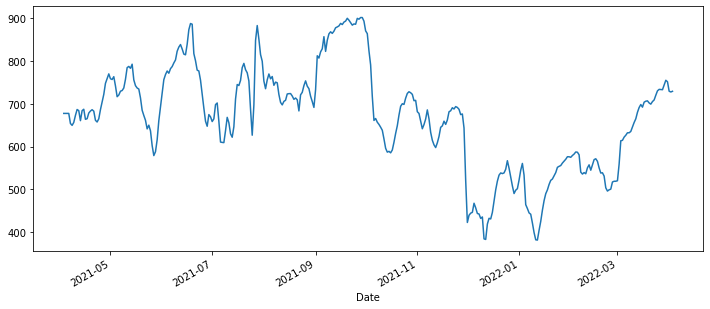

In [43]:
y['Mean Conductivity'].plot(figsize=(12,5))

## Mean Conductivity seems to be affected by seasonality. Fact that it makes sense, since it is high correlated with temperature, a known seasonal feature.

## Lets Test it 

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

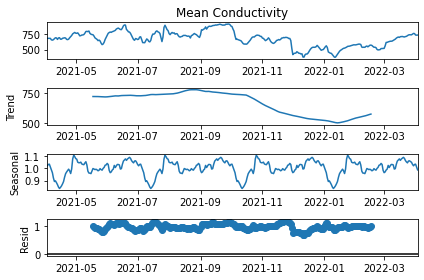

In [45]:
decompose_result = seasonal_decompose(y['Mean Conductivity'], model="multiplicative", period=90)

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

### Mean Conductivity's Sesonality 

<AxesSubplot:xlabel='Date'>

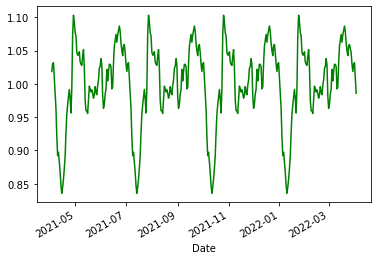

In [46]:
seasonality=decompose_result.seasonal
seasonality.plot(color='green')

# Let's Run an Adfuller Test, in order to be sure, by the p-value, that this feature is not stationary, proving it is indeed seasonal.  

# 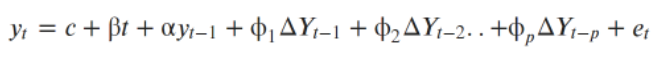

In [2]:
from statsmodels.tsa.stattools import adfuller

In [48]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(mean_conductivity):
    result=adfuller(mean_conductivity)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [49]:
test_result=adfuller_test(y['Mean Conductivity'])

ADF Test Statistic : -2.283117572562674
p-value : 0.17747071264238762
#Lags Used : 2
Number of Observations Used : 362
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Mean Conductivity it is indeed non-stationary 

### Lets try to remove (smooth)seasonality , by using moving averages method.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


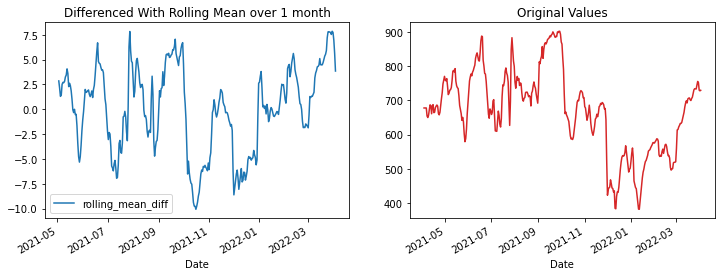

In [52]:
rolling_mean = y.rolling(window = 30).mean()
y['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()


ax1 = plt.subplot(121)
y['rolling_mean_diff'].plot(figsize=(12,4),color="tab:blue", title="Differenced With Rolling Mean over 1 month", ax=ax1,legend=True);
ax2 = plt.subplot(122)
y['Mean Conductivity'].plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);


In [54]:
## Again test dickey fuller test
adfuller_test(y['rolling_mean_diff'].dropna())

ADF Test Statistic : -3.7755246136066747
p-value : 0.0031678949391847184
#Lags Used : 7
Number of Observations Used : 327
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Now seasonality has been removed to a point where the feature is stationary.

# Use auto.arima with the stationary feature to recommend us the best p,d,q values.

In [55]:
import statsmodels.api as sm
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [56]:
select_arima=auto_arima(y['rolling_mean_diff'].dropna(),trace=True,suppress_warnings=True)
select_arima.summary()#minimize AIC

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=899.565, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1928.090, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1000.710, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1531.335, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1926.091, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=901.418, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=906.109, Time=0.08 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=896.235, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=904.212, Time=0.14 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=894.611, Time=0.27 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=906.100, Time=0.19 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=896.561, Time=0.36 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=896.582, Time=0.42 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=895.862, Time=0.29 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=9

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  335
Model:               SARIMAX(4, 0, 2)   Log Likelihood                -439.324
Date:                Tue, 12 Apr 2022   AIC                            892.647
Time:                        08:20:28   BIC                            919.346
Sample:                             0   HQIC                           903.291
                                - 335                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9725      0.166      5.861      0.000       0.647       1.298
ar.L2         -0.5956      0.255     -2.340      0.019      -1.095      -0.097
ar.L3          0.7583      0.194      3.909      0.000       0.378       1.138
ar.L4         -0.2234      0.090     -2.483      0.013      -0.400      -0.047
ma.L1          0.5844      0.163      3.584      0.000       0.265       0.904
ma.L2          0.6780      0.104      6.542      0.000       0.475       0.881
sigma2         0.7976      0.042     18.804      0.000       0.714       0.881
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               146.24
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                             0.30
Prob(H) (two-sided):                  0.11   Kurtosis:                         6.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Lets Try ARIMA(4,0,2) 

In [ ]:
#split to train and testing
train=y['rolling_mean_diff'].iloc[:-150] #
test=y['rolling_mean_diff'].iloc[-150: ]

In [58]:
from statsmodels.tsa.arima_model import ARIMA

## Train the model 

In [59]:
#train the model
model_arima=ARIMA(train.dropna(),order=(4,0,2))
model_fit=model_arima.fit()

In [60]:
train.isna().sum()

30

## Make predictions for the testing season and evaluate

In [61]:
index_future_dates=pd.date_range(start='2021-11-04',end='2022-04-02')
pred=model_fit.predict(start=len(train)-30,end=len(train)+119,typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates
print(pred)

2021-11-04   -3.753000
2021-11-05   -3.916973
2021-11-06   -3.742344
2021-11-07   -3.294778
2021-11-08   -3.144223
                ...   
2022-03-29   -0.236811
2022-03-30   -0.236797
2022-03-31   -0.236784
2022-04-01   -0.236772
2022-04-02   -0.236761
Freq: D, Name: ARIMA Predictions, Length: 150, dtype: float64


In [62]:
target_smoothed=pd.DataFrame({'Date':test.index,'Target Smoothed':test.values})
target_smoothed=target_smoothed.set_index('Date')
predicted_arima=pd.DataFrame({'Date':pred.index,'Predicted ARIMA':pred.values})
predicted_arima=predicted_arima.set_index('Date')

<AxesSubplot:xlabel='Date'>

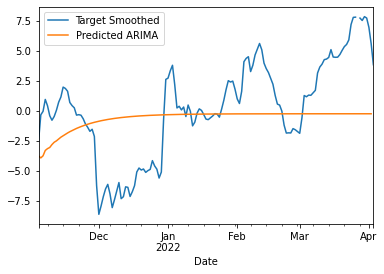

In [63]:
target_vs_predicted_arima=pd.concat([target_smoothed,predicted_arima],axis=1)
target_vs_predicted_arima.plot(legend=True)

## The model performs poorly
### This is due to the fact that maybe this specific ARIMA model it is not suitable for this feature. 
### Also as the feature has been smoothed, the predictions are not true to reality.

# Lets approach using SARIMAX, An ARIMA model that takes in account the Seasonality 

## We do not have to remove the seasonality. We will use the initial feature,Mean Conductivity. 

## We will use auto arima again to compensate for my luck of statistical knowledge and recommend us the best combination.

In [64]:
select_arima=auto_arima(y['Mean Conductivity'],trace=True,suppress_warnings=True)
select_arima.summary()#minimize AIC

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3202.303, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3308.557, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3222.757, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3205.963, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3306.571, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3202.061, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3201.877, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3200.827, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3202.504, Time=0.11 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=3202.401, Time=0.11 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=3204.181, Time=0.23 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=3198.834, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3199.884, Time=0.04 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=3200.513, Time=0.06 sec
 ARIMA(0,1,4)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(0, 1, 3)   Log Likelihood               -1595.417
Date:                Tue, 12 Apr 2022   AIC                           3198.834
Time:                        08:20:47   BIC                           3214.423
Sample:                             0   HQIC                          3205.030
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5870      0.033     18.030      0.000       0.523       0.651
ma.L2          0.0873      0.041      2.149      0.032       0.008       0.167
ma.L3         -0.0913      0.043     -2.100      0.036      -0.177      -0.006
sigma2       375.0559     17.313     21.663      0.000     341.122     408.989
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               378.51
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## SARIMAX(0, 1, 3) Is the model we will use but including the seasonality parameter. 

In [65]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [66]:
# Split in train and test
train=y['Mean Conductivity'].iloc[:-150]
test=y['Mean Conductivity'].iloc[-150: ]

In [67]:
#y['Seasonal First Difference']=y['Mean Conductivity']-y['Mean Conductivity'].shift(1)#remove trend

## Train the model. We set the seasonality factor to 90 days (approx.3 months) as it seems that it worked best after testing.

In [68]:
model=SARIMAX(train.dropna(),order=(0,1,3),seasonal_order=(0,1,3,90))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                  Mean Conductivity   No. Observations:                  215
Model:             SARIMAX(0, 1, 3)x(0, 1, 3, 90)   Log Likelihood                -586.816
Date:                            Tue, 12 Apr 2022   AIC                           1187.631
Time:                                    08:23:19   BIC                           1207.373
Sample:                                04-03-2021   HQIC                          1195.651
                                     - 11-03-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5377      0.083      6.496      0.000       0.375       0.700
ma.L2          0.0665      0.105      0.633      0.527      -0.139       0.272
ma.L3         -0.0811      0.091     -0.893      0.372      -0.259       0.097
ma.S.L90      -1.0925    229.667     -0.005      0.996    -451.231     449.046
ma.S.L180      1.0743    155.920      0.007      0.995    -304.523     306.671
ma.S.L270     -0.3580    233.186     -0.002      0.999    -457.393     456.677
sigma2       275.4374      0.465    592.362      0.000     274.526     276.349
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.63
Prob(Q):                              0.98   Prob(JB):                         0.06
Heteroskedasticity (H):               1.05   Skew:                            -0.00
Prob(H) (two-sided):                  0.89   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.23e+23. Standard errors may be unstable.
"""

In [228]:
train.isna().sum()

0

## Make predictions for the same period of time as the testing dataset, and evaluate the performance. 

In [229]:
index_future_dates=pd.date_range(start='2021-11-04',end='2022-04-02')
pred=model.predict(start=len(train),end=len(train)+149,typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates
print(pred)

2021-11-04    653.337881
2021-11-05    651.590678
2021-11-06    670.351438
2021-11-07    690.801347
2021-11-08    686.440788
                 ...    
2022-03-29    797.431326
2022-03-30    792.569181
2022-03-31    788.968773
2022-04-01    742.341530
2022-04-02    702.138023
Freq: D, Name: ARIMA Predictions, Length: 150, dtype: float64


In [230]:
target=pd.DataFrame({'Date':test.index,'Target':test.values})
target=target.set_index('Date')

In [231]:
predicted=pd.DataFrame({'Date':pred.index,'Predicted':pred.values})
predicted=predicted.set_index('Date')

<AxesSubplot:xlabel='Date'>

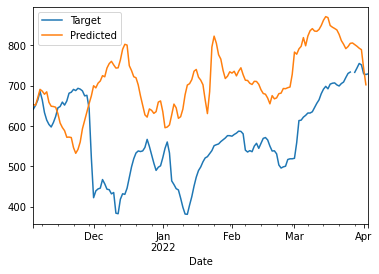

In [232]:
target_vs_predicted=pd.concat([target,predicted],axis=1)
target_vs_predicted.plot(legend=True)

## Much Better 

# Calculate RMSR 

In [233]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(predicted,test))
print(rmse)

181.16016897146596


## Use the model to make feature predictions of Mean Conductivity for the upcoming 5 months 

In [234]:
index_future_dates=pd.date_range(start='2022-04-04',end='2022-09-04')
pred=model.predict(start=len(y),end=len(y)+153,typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates
print(pred)

2022-04-04    646.232127
2022-04-05    602.130237
2022-04-06    613.765807
2022-04-07    616.790740
2022-04-08    608.531419
                 ...    
2022-08-31    662.031688
2022-09-01    668.257581
2022-09-02    687.721124
2022-09-03    671.733176
2022-09-04    695.184074
Freq: D, Name: ARIMA Predictions, Length: 154, dtype: float64


In [245]:
future_datest_df=pd.DataFrame({'Date':pred.index,'Prediction':pred.values})
future_datest_df=future_datest_df.set_index('Date')

In [246]:
future_df=pd.concat([y,future_datest_df])

In [247]:
future_df.head()

,Mean Conductivity,rolling_mean_diff,Arima prediction Smoothed,Prediction
Date,,,,
2021-04-03,677.460000,NaN,NaN,NaN
2021-04-04,677.460000,NaN,NaN,NaN
2021-04-05,677.460000,NaN,NaN,NaN
2021-04-06,677.460000,NaN,NaN,NaN
2021-04-07,653.989583,NaN,NaN,NaN


## Display the predictions

<AxesSubplot:title={'center':'SARIMAX FUTURE PREDICTION OVER 5 MONTHS'}, xlabel='Date'>

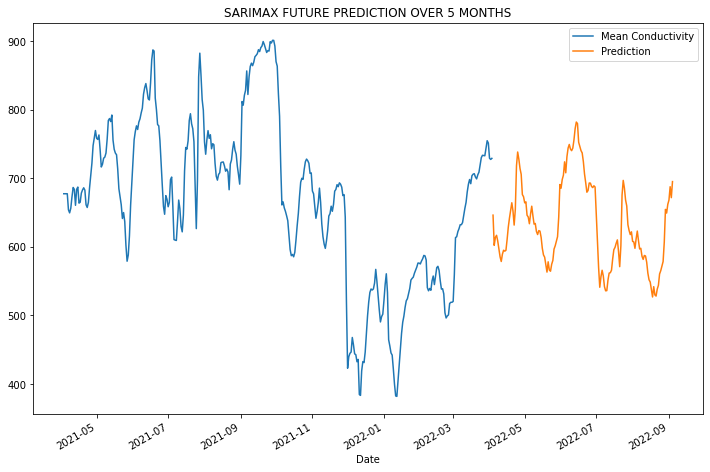

In [248]:

future_df[['Mean Conductivity', 'Prediction']].plot(figsize=(12, 8),title='SARIMAX FUTURE PREDICTION OVER 5 MONTHS') 